In [11]:
#F I L M A F F I N I T Y

import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Solicitud HTTP a la página para analizar el contenido HTML
url = "https://www.filmaffinity.com/es/ranking.php?rn=ranking_fa_movies&chv=0"
page = requests.get(url)
soup = BeautifulSoup(page.content,"html.parser")


In [5]:
#PELICULAS

nombres = soup.find_all("div", class_="mc-title")
peliculas = []
count = 0
for i in nombres:
  if count < 30:
    peliculas.append(i.text)
    count += 1
  else:
      break
print(peliculas)
print("-------------------------------------------------")
print(len (peliculas))


['El padrino  (1972)   ', 'El padrino. Parte II  (1974)   ', 'Doce hombres sin piedad  (1957)   ', 'La lista de Schindler  (1993)   ', 'Testigo de cargo  (1957)   ', 'Luces de la ciudad  (1931)   ', 'Cadena perpetua  (1994)   ', 'Tiempos modernos  (1936)   ', 'El gran dictador  (1940)   ', 'Pulp Fiction  (1994)   ', 'El golpe  (1973)   ', 'Ser o no ser  (1942)   ', 'Harakiri  (1962)   ', 'El crepúsculo de los dioses  (1950)   ', 'La vida es bella  (1997)   ', 'Eva al desnudo  (1950)   ', 'Senderos de gloria  (1957)   ', 'El infierno del odio  (1963)   ', 'Los siete samuráis  (1954)   ', 'Amanecer  (1927)   ', 'Perdición  (1944)   ', 'El apartamento  (1960)   ', 'Ciudad de Dios  (2002)   ', 'El chico  (1921)   ', 'La evasión  (1960)   ', 'Psicosis  (1960)   ', 'La quimera del oro  (1925)   ', 'Uno de los nuestros  (1990)   ', 'Casablanca  (1942)   ', 'Alguien voló sobre el nido del cuco  (1975)   ']
-------------------------------------------------
30


In [6]:
#Dividimos una lista en dos

titulo = []
año = []

for film in peliculas:
    nombre, year = film.split(' (')  #Separación de la lista "peliculas"
    titulo.append(nombre)
    año.append(year.replace(')  ', ''))  # Eliminar el paréntesis de cierre

print("Nombres de películas:", titulo, len(titulo))
print("------------------------------------------------------------------------------------------------------")
print("Años de películas:", año, len(año))


Nombres de películas: ['El padrino ', 'El padrino. Parte II ', 'Doce hombres sin piedad ', 'La lista de Schindler ', 'Testigo de cargo ', 'Luces de la ciudad ', 'Cadena perpetua ', 'Tiempos modernos ', 'El gran dictador ', 'Pulp Fiction ', 'El golpe ', 'Ser o no ser ', 'Harakiri ', 'El crepúsculo de los dioses ', 'La vida es bella ', 'Eva al desnudo ', 'Senderos de gloria ', 'El infierno del odio ', 'Los siete samuráis ', 'Amanecer ', 'Perdición ', 'El apartamento ', 'Ciudad de Dios ', 'El chico ', 'La evasión ', 'Psicosis ', 'La quimera del oro ', 'Uno de los nuestros ', 'Casablanca ', 'Alguien voló sobre el nido del cuco '] 30
------------------------------------------------------------------------------------------------------
Años de películas: ['1972 ', '1974 ', '1957 ', '1993 ', '1957 ', '1931 ', '1994 ', '1936 ', '1940 ', '1994 ', '1973 ', '1942 ', '1962 ', '1950 ', '1997 ', '1950 ', '1957 ', '1963 ', '1954 ', '1927 ', '1944 ', '1960 ', '2002 ', '1921 ', '1960 ', '1960 ', '1925 

In [7]:
#CALIFICACIÓN

rank = soup.find_all("div",class_="avg-rating")
puntuacion = list()
count = 0
for i in rank:
  if count < 30:
    puntuacion.append(i.text)
  else:
    break
  count += 1
print(puntuacion,len(puntuacion))

['9,0', '8,9', '8,7', '8,6', '8,6', '8,6', '8,6', '8,6', '8,6', '8,6', '8,5', '8,5', '8,5', '8,5', '8,5', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,4', '8,3'] 30


In [8]:
#DIRECTOR

dir = soup.find_all("div",class_="mc-director")
director = list()
count = 0
for i in dir:
  if count < 30:
    director.append(i.text)
  else:
    break
  count += 1
print(director,len(director))

['Francis Ford Coppola', 'Francis Ford Coppola', 'Sidney Lumet', 'Steven Spielberg', 'Billy Wilder', 'Charles Chaplin', 'Frank Darabont', 'Charles Chaplin', 'Charles Chaplin', 'Quentin Tarantino', 'George Roy Hill', 'Ernst Lubitsch', 'Masaki Kobayashi', 'Billy Wilder', 'Roberto Benigni', 'Joseph L. Mankiewicz', 'Stanley Kubrick', 'Akira Kurosawa', 'Akira Kurosawa', 'F.W. Murnau', 'Billy Wilder', 'Billy Wilder', 'Fernando Meirelles, Kátia Lund', 'Charles Chaplin', 'Jacques Becker', 'Alfred Hitchcock', 'Charles Chaplin', 'Martin Scorsese', 'Michael Curtiz', 'Milos Forman'] 30


In [9]:
#CANTIDAD DE VOTOS

num = soup.find_all("div",class_="rat-count")
votos = list()
count = 0
for i in num:
  if count < 30:
    votos.append(i.text.replace('.', ''))
  else:
    break
  count += 1
print(votos,len(votos))

['174207 ', '139015 ', '70419 ', '174526 ', '44697 ', '32822 ', '168722 ', '63251 ', '85738 ', '202130 ', '100631 ', '35462 ', '13200 ', '47272 ', '191303 ', '35605 ', '56031 ', '9832 ', '42752 ', '14487 ', '33959 ', '81386 ', '127821 ', '33114 ', '12924 ', '108957 ', '28062 ', '113092 ', '97999 ', '110793 '] 30


In [10]:
tabla = pd.DataFrame({"TITULO ": titulo,"AÑO ": año, "VALORACION": puntuacion, "DIRECTOR": director, "VOTOS  ": votos}, index = list (range(1,31)))

print(tabla.to_string())

                                 TITULO    AÑO  VALORACION                        DIRECTOR  VOTOS  
1                            El padrino   1972         9,0            Francis Ford Coppola  174207 
2                  El padrino. Parte II   1974         8,9            Francis Ford Coppola  139015 
3               Doce hombres sin piedad   1957         8,7                    Sidney Lumet   70419 
4                 La lista de Schindler   1993         8,6                Steven Spielberg  174526 
5                      Testigo de cargo   1957         8,6                    Billy Wilder   44697 
6                    Luces de la ciudad   1931         8,6                 Charles Chaplin   32822 
7                       Cadena perpetua   1994         8,6                  Frank Darabont  168722 
8                      Tiempos modernos   1936         8,6                 Charles Chaplin   63251 
9                      El gran dictador   1940         8,6                 Charles Chaplin   85738 


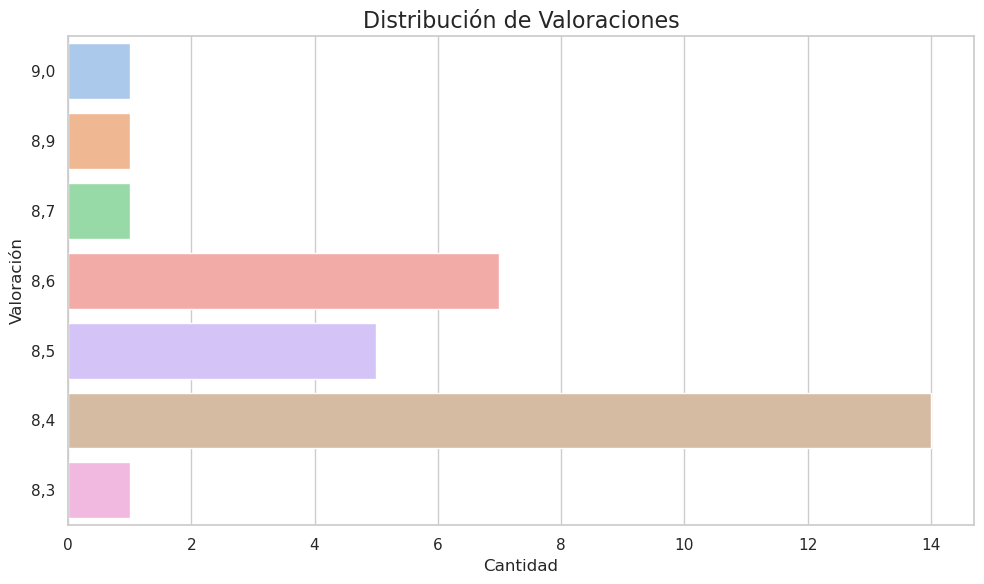

In [19]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.countplot(y="VALORACION", data=tabla, palette="pastel")

plt.title("Distribución de Valoraciones", fontsize=16)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Valoración", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
tabla.to_csv("Peliculas001.csv", index = False)